In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/home/darshan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
learning_rate = 0.05
training_epochs = 500
display_step = 50

In [12]:
# Training Data
train_X = numpy.asarray([2.5,3.8,4.8,5.11,5.36,3.22,7.77,8.29,7.90,4.75,
                         5.42,12.10,4.51,8.617,6.456,9.27,4.5])
train_Y = numpy.asarray([0.94,1.786,2.06,2.99,1.892,2.567,3.662,5.55,2.22,1.111,
                         1.876,2.415,1.653,2.904,2.452,2.94,2.34])
n_samples = train_X.shape[0]

In [13]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [14]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [15]:
 #Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Epoch: 0050 cost= 0.399851620 W= 0.208156 b= 1.0052
Epoch: 0100 cost= 0.398366421 W= 0.19907 b= 1.07553
Epoch: 0150 cost= 0.397739172 W= 0.192654 b= 1.1252
Epoch: 0200 cost= 0.397506326 W= 0.188124 b= 1.16028
Epoch: 0250 cost= 0.397446692 W= 0.184924 b= 1.18505
Epoch: 0300 cost= 0.397456914 W= 0.182664 b= 1.20255
Epoch: 0350 cost= 0.397490144 W= 0.181068 b= 1.2149
Epoch: 0400 cost= 0.397526652 W= 0.179941 b= 1.22363
Epoch: 0450 cost= 0.397558868 W= 0.179145 b= 1.22979
Epoch: 0500 cost= 0.397584915 W= 0.178584 b= 1.23414
Optimization Finished!
Training cost= 0.397585 W= 0.178584 b= 1.23414 



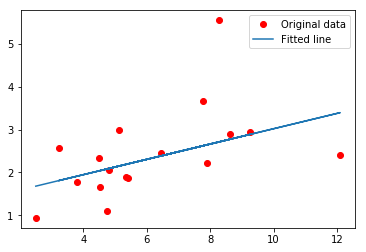

Testing... (Mean square loss Comparison)
Testing cost= 0.198439
Absolute mean square loss difference: 0.199146


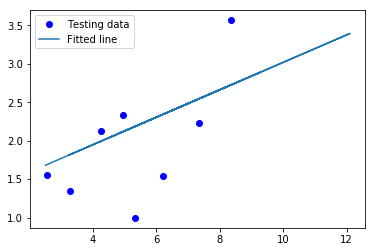

In [31]:
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

 # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X=numpy.asarray([5.32,6.22,4.95,8.365,7.331,4.25,2.544,3.26])
    test_Y = numpy.asarray([0.995,1.54, 2.34, 3.568, 2.231, 2.124, 1.56, 1.34])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()